# Load data
Merge train and test with Customer ID and Zip code

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from os import listdir

%matplotlib inline

path = "./data"
fileName_list = listdir(path)

# take out test, train
fileName_list = fileName_list[:7]
fileName_list.remove("population.csv")
fileName_list.remove("sample_submission.csv")
fileName_list

['demographics.csv',
 'location.csv',
 'satisfaction.csv',
 'services.csv',
 'status.csv']

In [2]:
train = pd.read_csv('./data/Train_IDs.csv')
test = pd.read_csv('./data/Test_IDs.csv')

for i in fileName_list:
    target_path = path + "/" + i
    target_data = pd.read_csv(target_path)
    #train = pd.concat([train, target_data], axis=1, join="inner")
    if i == "location.csv":
        population_data = pd.read_csv("./data/population.csv")
        del population_data["ID"]
        target_data = pd.merge(target_data, population_data, how="left", on="Zip Code")
    train = pd.merge(train, target_data, how="left", on="Customer ID")
    test = pd.merge(test, target_data, how="left", on="Customer ID")
train

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category
0,0650-BWOZN,1.0,Male,37.0,No,No,NaN,No,0.0,NaN,...,One Year,Yes,Bank Withdrawal,85.15,3030.60,0.0,0.0,892.85,3923.45,Competitor
1,0562-FGDCR,1.0,NaN,54.0,No,No,No,No,0.0,1.0,...,Month-to-Month,No,NaN,35.90,35.90,0.0,0.0,0.00,35.90,Competitor
2,6688-UZPWD,1.0,Male,NaN,Yes,No,NaN,Yes,NaN,1.0,...,One Year,NaN,Bank Withdrawal,20.05,746.75,NaN,0.0,1435.70,2182.45,No Churn
3,2905-KFQUV,1.0,Male,23.0,Yes,No,No,No,0.0,1.0,...,Month-to-Month,NaN,NaN,74.65,544.55,0.0,10.0,NaN,705.61,Competitor
4,9720-JJJOR,1.0,Female,41.0,No,NaN,Yes,No,0.0,1.0,...,Two Year,No,Credit Card,25.80,1911.50,0.0,NaN,1164.16,3075.66,No Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1178-PZGAB,1.0,Male,27.0,Yes,No,NaN,No,0.0,NaN,...,Month-to-Month,No,Mailed Check,20.20,20.20,NaN,0.0,42.15,62.35,NaN
5630,4806-KEXQR,1.0,Female,50.0,No,No,No,NaN,0.0,1.0,...,NaN,No,Credit Card,74.80,2971.70,0.0,0.0,742.80,3714.50,NaN
5631,8809-RIHDD,NaN,Male,60.0,No,No,No,Yes,2.0,NaN,...,Month-to-Month,No,Credit Card,45.65,985.05,NaN,0.0,410.97,1396.02,No Churn
5632,6663-JOCQO,1.0,Female,NaN,No,No,No,Yes,3.0,NaN,...,One Year,Yes,Credit Card,79.50,1264.20,0.0,0.0,435.68,1699.88,No Churn


# Data Analysis
Count被記錄了三份, 分別在demographics、location、services裡都有一份，其中只要非空，皆為1。 然而三份之中，非空的數量有些許不同，分別為4310、4323、4317

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 5633
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5634 non-null   object 
 1   Count_x                            4317 non-null   float64
 2   Gender                             4308 non-null   object 
 3   Age                                4316 non-null   float64
 4   Under 30                           4337 non-null   object 
 5   Senior Citizen                     4314 non-null   object 
 6   Married                            4317 non-null   object 
 7   Dependents                         4305 non-null   object 
 8   Number of Dependents               4318 non-null   float64
 9   Count_y                            4323 non-null   float64
 10  Country                            4337 non-null   object 
 11  State                              4330 non-null   objec

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        1409 non-null   object 
 1   Count_x                            1076 non-null   float64
 2   Gender                             1085 non-null   object 
 3   Age                                1077 non-null   float64
 4   Under 30                           1056 non-null   object 
 5   Senior Citizen                     1079 non-null   object 
 6   Married                            1076 non-null   object 
 7   Dependents                         1088 non-null   object 
 8   Number of Dependents               1075 non-null   float64
 9   Count_y                            1070 non-null   float64
 10  Country                            1056 non-null   object 
 11  State                              1063 non-null   objec

In [5]:
train.describe()

,Count_x,Age,Number of Dependents,Count_y,Zip Code,Latitude,Longitude,Population,Satisfaction Score,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,4317.0,4316.000000,4318.000000,4323.0,4329.000000,4325.000000,4315.000000,4329.000000,4296.000000,4310.0,4337.000000,4330.000000,4309.000000,4307.000000,4336.000000,4322.000000,4310.000000,4323.000000,4339.000000,4324.000000
mean,1.0,46.701112,0.479620,1.0,93474.305151,36.184421,-119.753591,22439.556249,3.262337,1.0,1.902006,32.567667,22.950278,20.452055,64.400104,2282.358697,1.955443,6.662040,752.510168,3044.473534
std,0.0,16.823413,0.973795,0.0,1850.814739,2.446586,2.147933,21299.254720,1.200247,0.0,2.973567,24.601592,15.464678,20.390958,30.049952,2259.136748,7.838492,24.487024,847.861924,2861.429737
min,1.0,19.000000,0.000000,1.0,90001.000000,32.555828,-124.301372,11.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,0.000000,21.360000
25%,1.0,33.000000,0.000000,1.0,92082.000000,33.991782,-121.765866,2723.000000,3.000000,1.0,0.000000,9.000000,9.190000,3.000000,35.050000,416.750000,0.000000,0.000000,69.810000,643.335000
50%,1.0,46.000000,0.000000,1.0,93516.000000,36.186867,-119.521126,17846.000000,3.000000,1.0,0.000000,29.000000,22.560000,17.000000,70.275000,1397.475000,0.000000,0.000000,413.280000,2111.415000
75%,1.0,60.000000,0.000000,1.0,95321.000000,38.128087,-117.993368,36186.000000,4.000000,1.0,3.000000,56.000000,36.470000,27.000000,89.700000,3778.687500,0.000000,0.000000,1199.360000,4785.692500
max,1.0,80.000000,9.000000,1.0,96150.000000,41.962127,-114.192901,105285.000000,5.000000,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.790000,150.000000,3564.000000,11979.340000


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn Category', ylabel='count'>

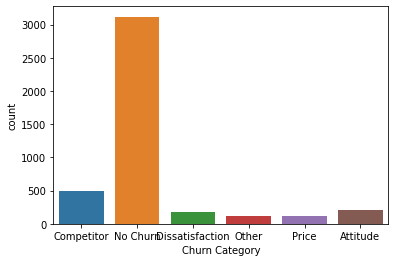

In [6]:
sns.countplot(train['Churn Category'])

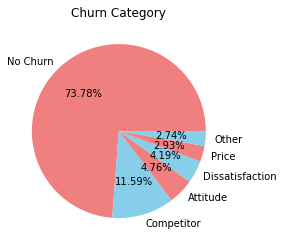

In [7]:
train['Churn Category'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Churn Category' )  # 圖標題
plt.ylabel( '' )
plt.show()

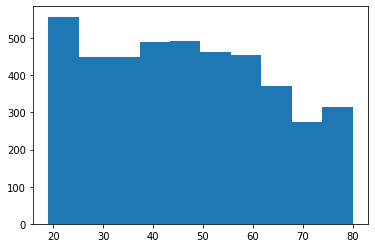

In [8]:
plt.hist(train['Age'])
plt.show()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


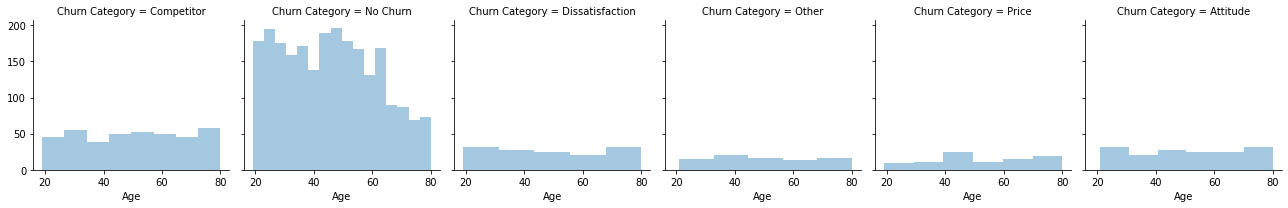

In [9]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Age', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

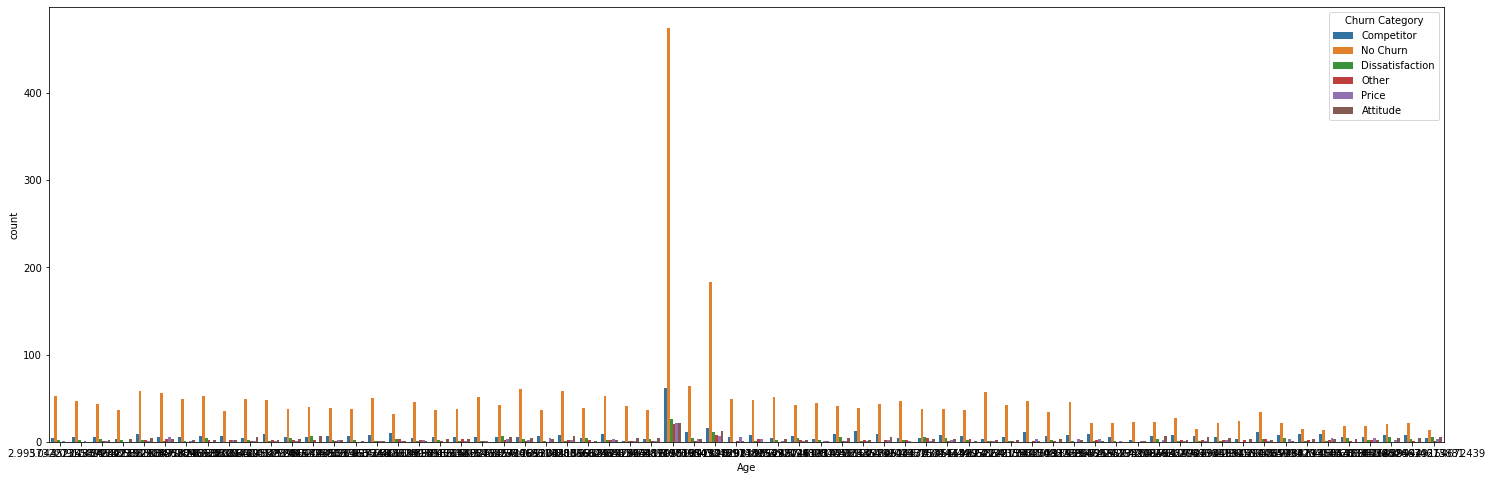

In [118]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 25,8

sns.countplot(train['Age'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


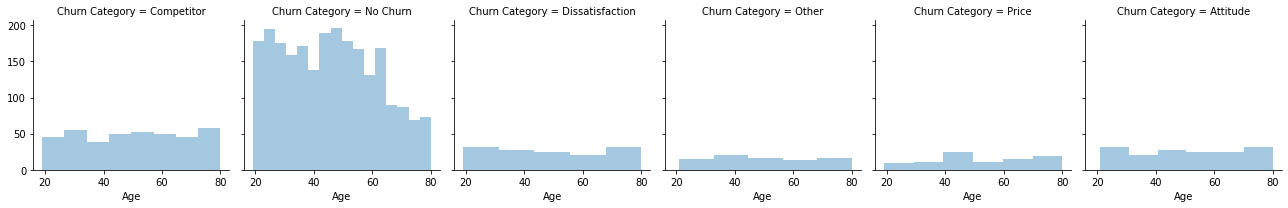

In [11]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Age', kde=False)

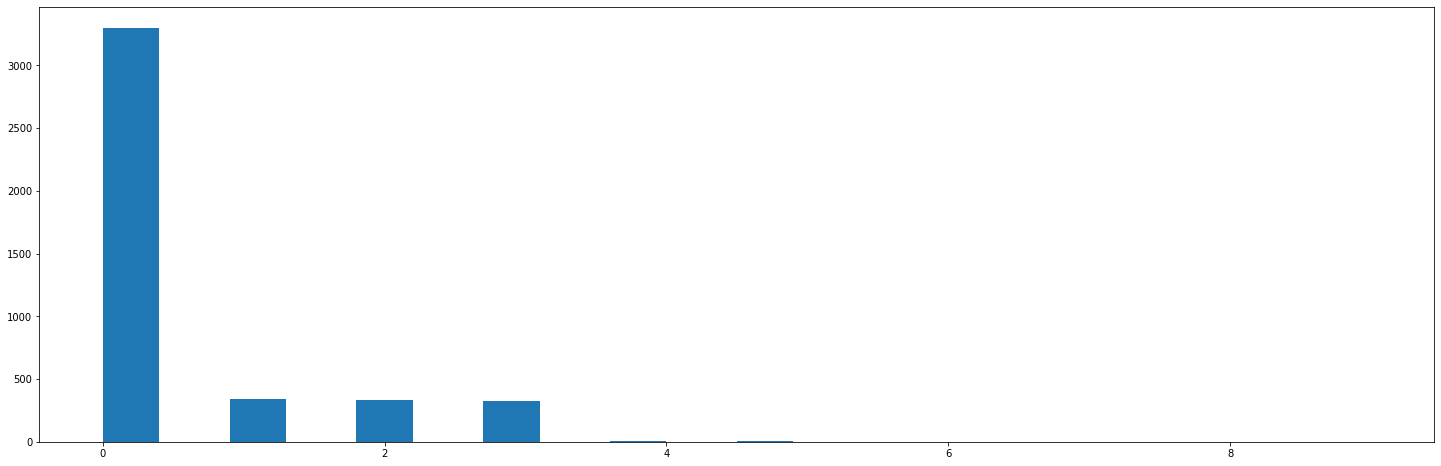

In [12]:
plt.hist(train['Number of Dependents'], width=0.4)
plt.show()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

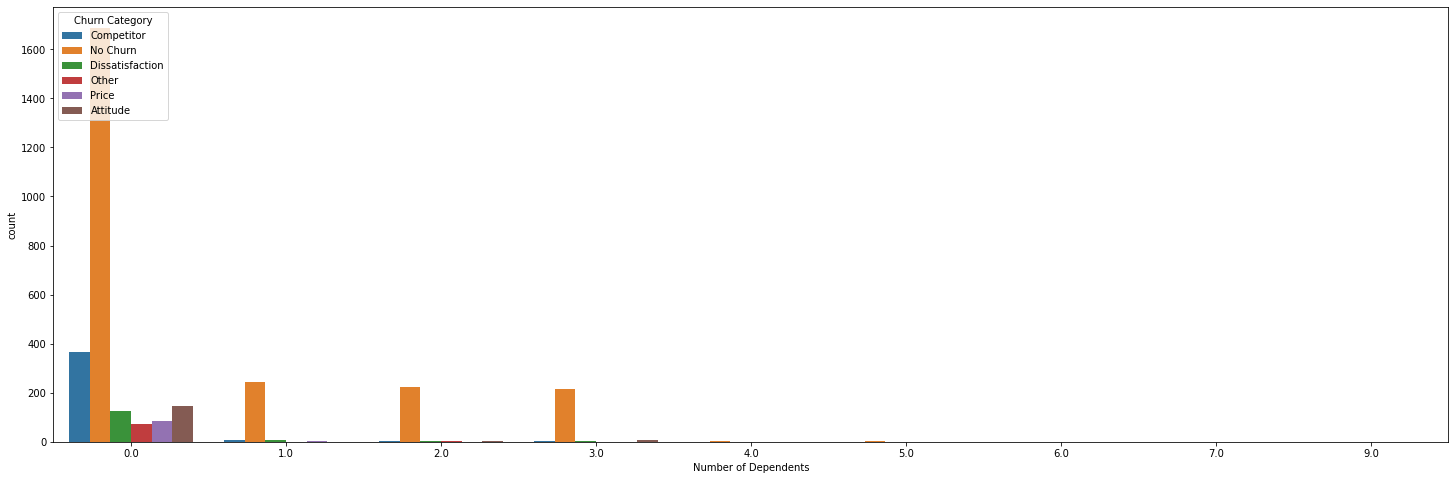

In [13]:
sns.countplot(train['Number of Dependents'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


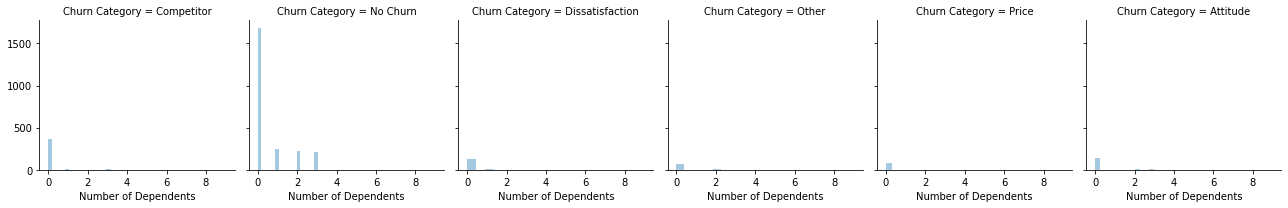

In [14]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Number of Dependents', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Count_x', ylabel='count'>

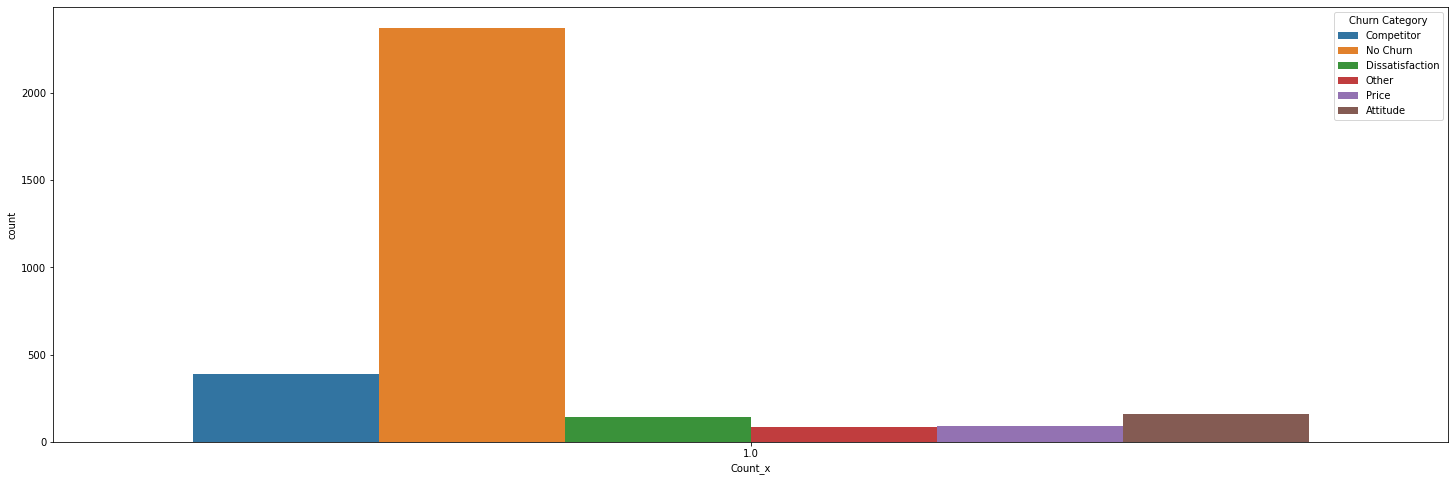

In [15]:
sns.countplot(train['Count_x'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Count_y', ylabel='count'>

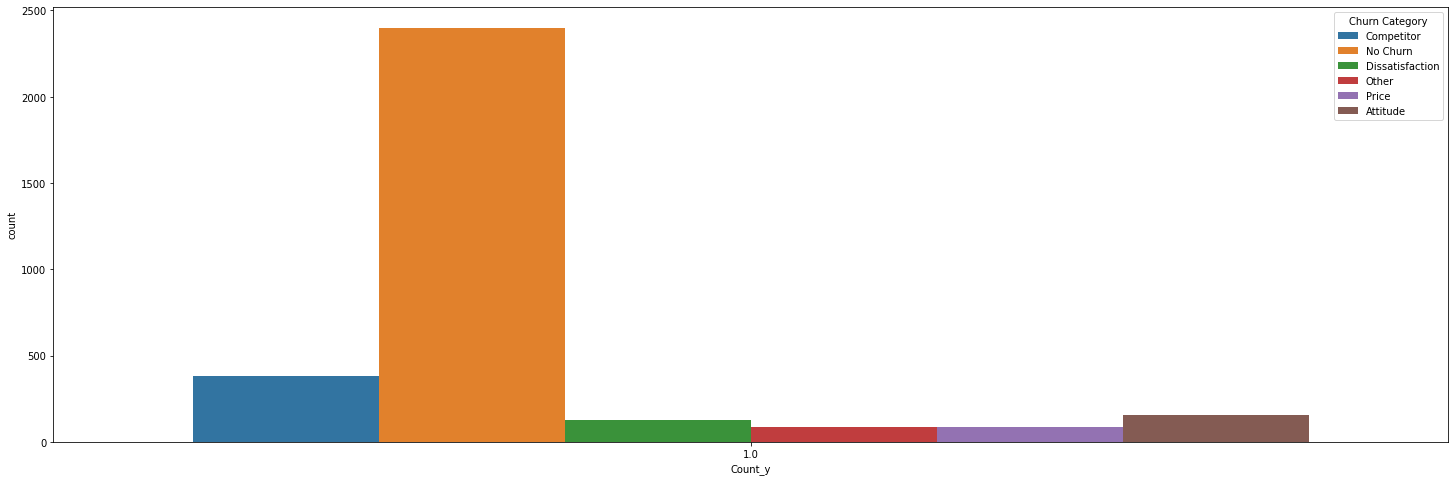

In [16]:
sns.countplot(train['Count_y'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Count', ylabel='count'>

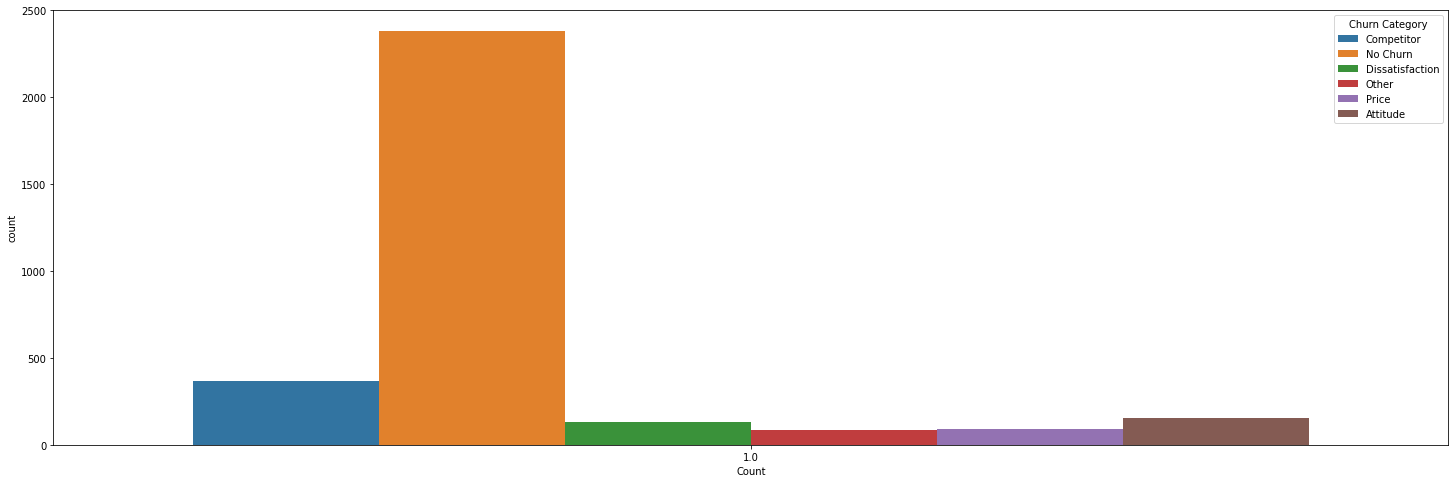

In [17]:
sns.countplot(train['Count'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


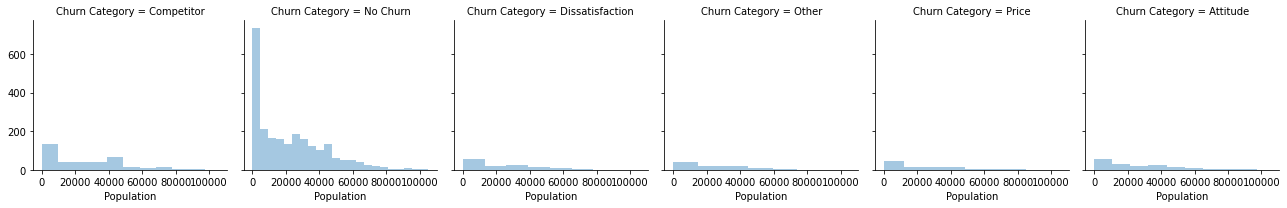

In [18]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Population', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


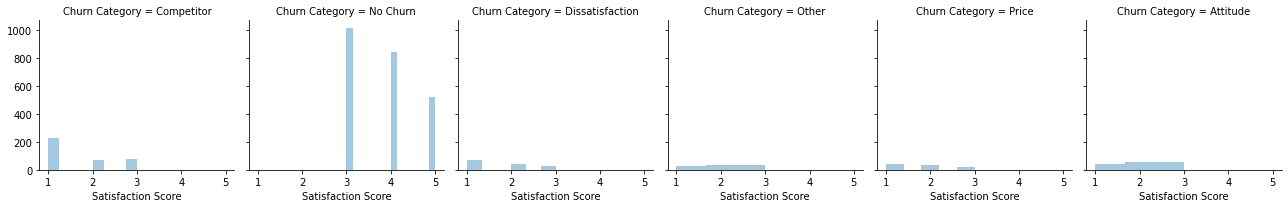

In [19]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Satisfaction Score', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


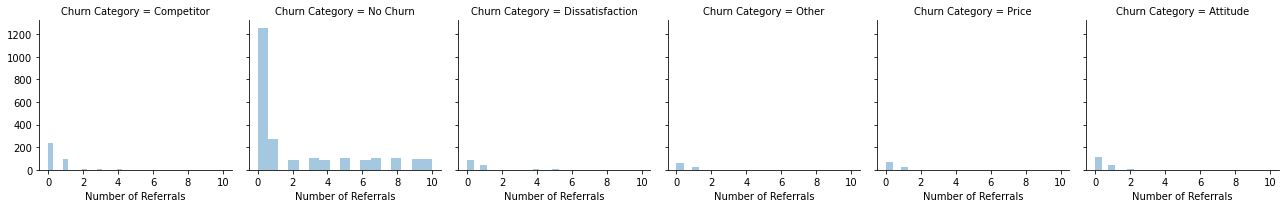

In [20]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Number of Referrals', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


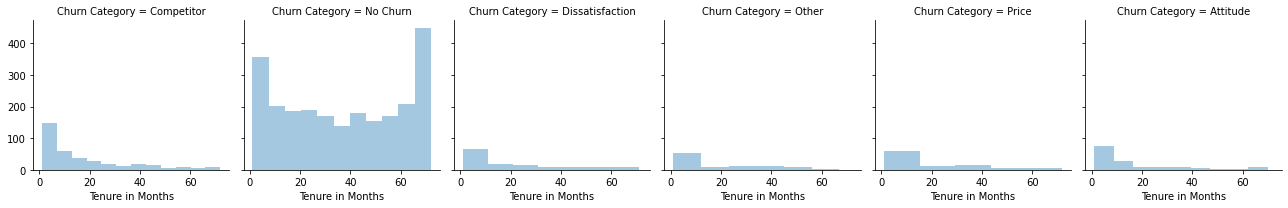

In [21]:
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Tenure in Months', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Under 30', ylabel='count'>

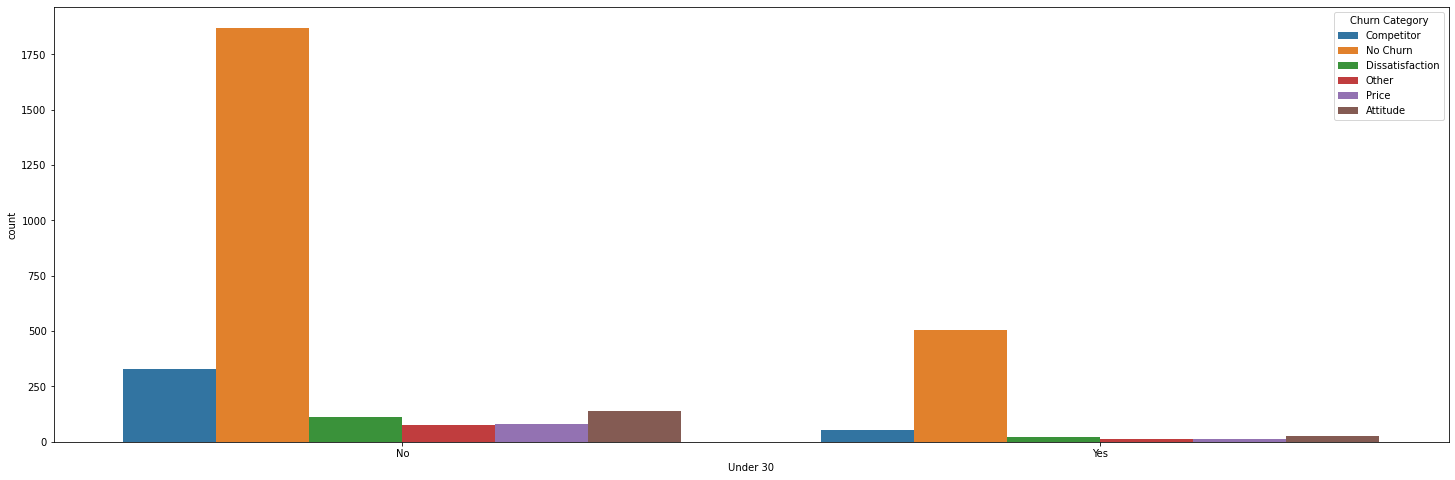

In [22]:
sns.countplot(train['Under 30'], hue = train['Churn Category'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


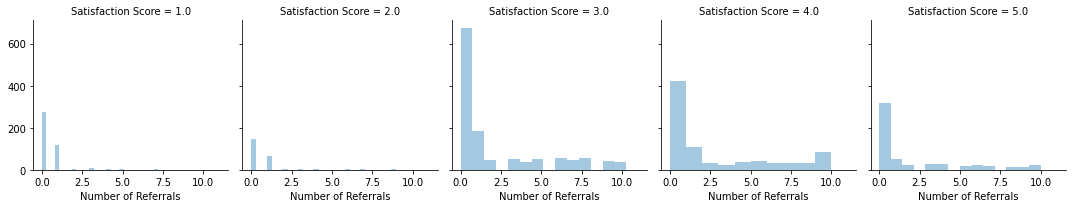

In [23]:
# satisfaction / Number of Referral
g = sns.FacetGrid(train, col='Satisfaction Score')
g.map(sns.distplot, 'Number of Referrals', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


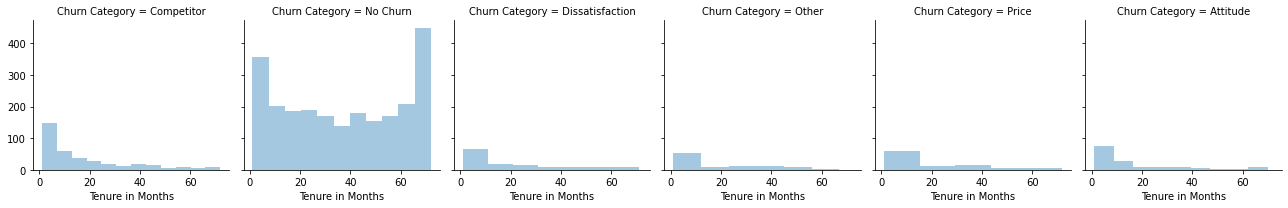

In [24]:
# Tenure in Months
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Tenure in Months', kde=False)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Offer', ylabel='count'>

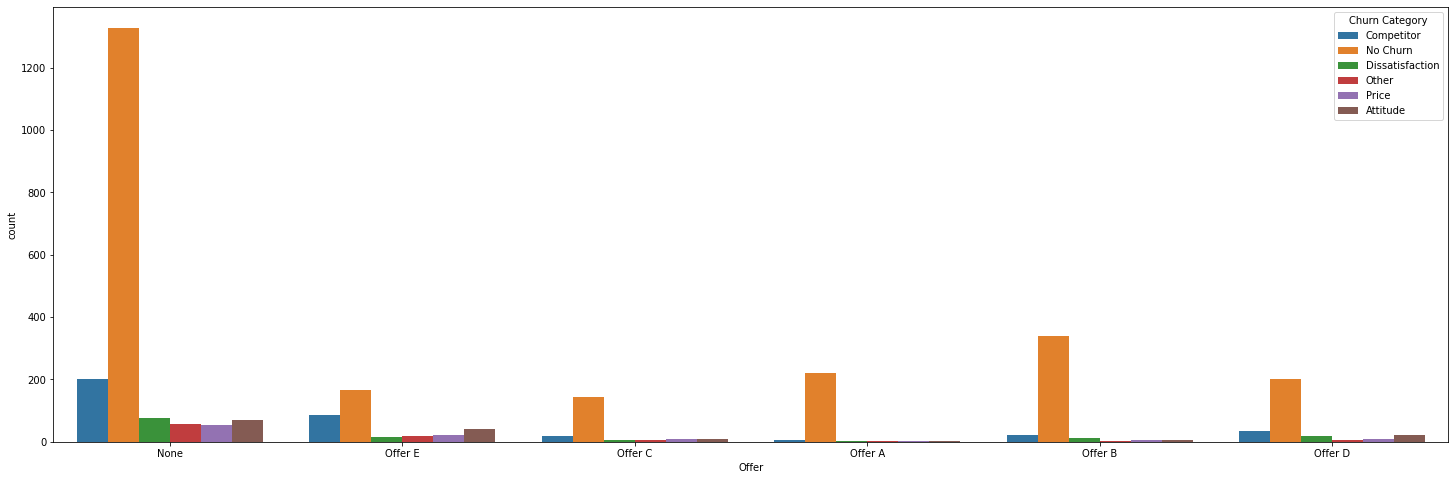

In [25]:
# Offer
sns.countplot(train['Offer'], hue = train['Churn Category'])

# Preprocess

Count 三個merge 起來了, 三個之中有不為1的 補1<br>
性別看分布、美國性別比大約55, 隨機補 0 or 1<br>
Age 暫時補 平均數<br>
同時補上Under 30跟Senior Citizen<br>

同住人數(Number of Dependents) 暫時補0, 因為從與最後分類德關係來看, 大於1有很大的影響<br>
Note: 後期可能可以用Married, Age, 推薦人數...預測<br>

Note：Population是從Zip Code 補過來的

11  Zip Code<br>
12  Lat Long<br>
13  Latitude<br>
14  Longitude<br>
暫時丟掉

In [26]:
# Churn Category, 最終要預測的類別, 沒有值的都丟掉
#filt = train['Churn Category'].notnull()
#train = train.loc[filt]

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 5633
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5634 non-null   object 
 1   Count_x                            4317 non-null   float64
 2   Gender                             4308 non-null   object 
 3   Age                                4316 non-null   float64
 4   Under 30                           4337 non-null   object 
 5   Senior Citizen                     4314 non-null   object 
 6   Married                            4317 non-null   object 
 7   Dependents                         4305 non-null   object 
 8   Number of Dependents               4318 non-null   float64
 9   Count_y                            4323 non-null   float64
 10  Country                            4337 non-null   object 
 11  State                              4330 non-null   objec

In [28]:
# 將train, test合併處理, 並新增一個欄位用以標記
train = pd.concat([train.assign(is_train = 1), test.assign(is_train = 0)])

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 1408
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count_x                            5393 non-null   float64
 2   Gender                             5393 non-null   object 
 3   Age                                5393 non-null   float64
 4   Under 30                           5393 non-null   object 
 5   Senior Citizen                     5393 non-null   object 
 6   Married                            5393 non-null   object 
 7   Dependents                         5393 non-null   object 
 8   Number of Dependents               5393 non-null   float64
 9   Count_y                            5393 non-null   float64
 10  Country                            5393 non-null   object 
 11  State                              5393 non-null   objec

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Count_merge', ylabel='count'>

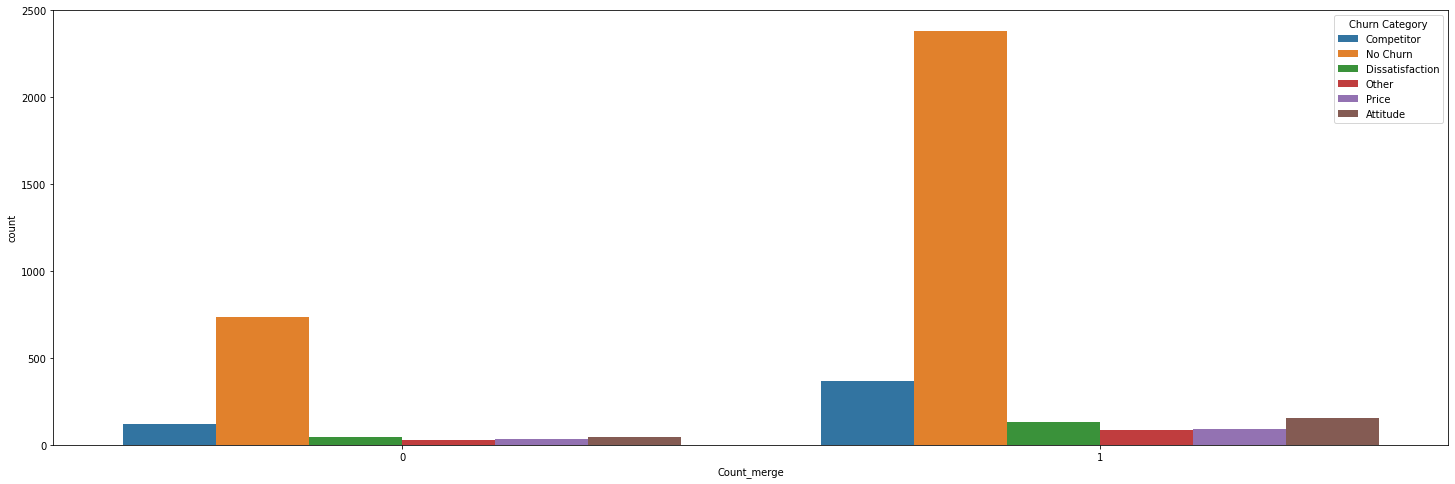

In [30]:
# Merge field 'Count', 'Count_x', 'Count_y'
train['Count'] = train['Count'].fillna(0)
train['Count_x'] = train['Count'].fillna(0)
train['Count_y'] = train['Count'].fillna(0)

# Add up three field
train['Count_merge'] = train['Count'] + train['Count_x'] + train['Count_y']
# if the result bigger than 1, then the value set to 1. Or be 0.
train['Count_merge'] = train['Count_merge'].apply(lambda x: 1 if x > 0 else 0)
train = train.drop(['Count', 'Count_x', 'Count_y'], axis=1)
sns.countplot(train['Count_merge'], hue = train['Churn Category'])

In [34]:
train['Gender']


0         Male
1          NaN
2         Male
3         Male
4       Female
         ...  
1404      Male
1405    Female
1406      Male
1407    Female
1408       NaN
Name: Gender, Length: 7043, dtype: object

In [33]:
train['Gender'].value_counts()

Male      2731
Female    2662
Name: Gender, dtype: int64

In [35]:
7043-2731-2662

1650

In [37]:
train['Gender'] = train['Gender'].map({"Male":2731, "Female":2662})
train['Gender'].fillna(1650)

0       1650.0
1       1650.0
2       1650.0
3       1650.0
4       1650.0
         ...  
1404    1650.0
1405    1650.0
1406    1650.0
1407    1650.0
1408    1650.0
Name: Gender, Length: 7043, dtype: float64

In [38]:
# # Gender, 補1 代表未知
# train['Gender'] = train['Gender'].map({'Male':0, 'Female':2})
# train['Gender'] = train['Gender'].fillna(1)
# sns.countplot(train['Gender'], hue = train['Churn Category'])

In [39]:
# train['Gender'].value_counts()

In [40]:
# Age,Under 30,Senior Citizen
#Age<30 u30補Yes 
filt1 = train['Age'] < 30
mean_u30 = train.loc[filt1, ['Age']].mean() 
filt2 = train["Under 30"].isnull()
train.loc[(filt1 & filt2), ["Under 30"]] = train.loc[(filt1 & filt2), ["Under 30"]].fillna('Yes')

#Age>=65 SC補Yes
filt1 = train['Age'] >= 65
mean_SC = train.loc[filt1, ['Age']].mean() 
filt2 = train["Senior Citizen"].isnull()
train.loc[(filt1 & filt2), ["Senior Citizen"]] = train.loc[(filt1 & filt2), ["Senior Citizen"]].fillna('Yes')


filt0 = train['Age'].isnull()
filt1 = train['Age'] >= 30
filt2 = train['Age'] < 65
mean_30to65 = train.loc[(filt1&filt2), ['Age']].mean()

#u30 = Yes Age 補<30的 mean
filt3 = train["Under 30"] == 'Yes'
train.loc[(filt0 & filt3), ['Age']] = train.loc[(filt0 & filt3), ['Age']].fillna(mean_u30)

#SC = Yes Age 補>=65的 mean
filt3 = train["Senior Citizen"] == 'Yes'
train.loc[(filt0 & filt3), ['Age']] = train.loc[(filt0 & filt3), ['Age']].fillna(mean_SC)

#u30 = No & SC = No & Age 補30=<Age<65的 mean
filt3 = train["Under 30"] == 'No'
filt4 = train["Senior Citizen"] == 'No'
train.loc[(filt0 & filt3 & filt4), ['Age']] = train.loc[(filt0 & filt3 & filt4), ['Age']].fillna(mean_30to65)

#u30 = null & SC = null & Age 補mean
age_mean = train['Age'].mean()

train['Age'] = train['Age'].fillna(age_mean)

train["Under 30"] = train["Under 30"].fillna('No')
train["Senior Citizen"] = train["Senior Citizen"].fillna('No')

train['Under 30'] = train['Under 30'].map({'Yes':1, 'No':0})

train["Senior Citizen"] = train["Senior Citizen"].map({"Yes":1, "No":0})

In [41]:
print(mean_u30)
print(mean_SC)
print(mean_30to65)
print(age_mean)

Age    23.907547
dtype: float64
Age    72.407735
dtype: float64
Age    47.036173
dtype: float64
46.67527672739572


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 1408
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             0 non-null      float64
 2   Age                                7043 non-null   float64
 3   Under 30                           7043 non-null   int64  
 4   Senior Citizen                     7043 non-null   int64  
 5   Married                            5393 non-null   object 
 6   Dependents                         5393 non-null   object 
 7   Number of Dependents               5393 non-null   float64
 8   Country                            5393 non-null   object 
 9   State                              5393 non-null   object 
 10  City                               5393 non-null   object 
 11  Zip Code                           5393 non-null   float

In [43]:
# Corr_Matrix = train.corr()
# Corr_Matrix['Gender']

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


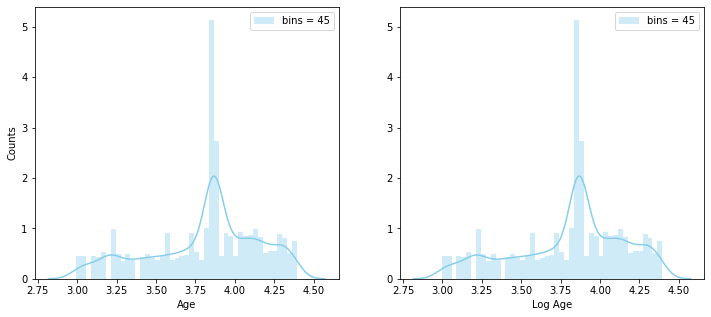

In [44]:
# 對 Fare 欄位取對數
train['Age'] = np.log1p( train.Age )

# 直方圖(Histogram)
fig, axs = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot( 1,2,1 )
sns.distplot( train.Age, kde=True, bins=45, color='skyblue', label='bins = 45' )
plt.xlabel( 'Age' ) 
plt.ylabel( 'Counts' ) 
plt.legend( )

plt.subplot( 1,2,2 )
sns.distplot( train.Age, kde=True, bins=45, color='skyblue', label='bins = 45' )
plt.xlabel( 'Log Age' ) 
plt.ylabel( '' ) 
plt.legend( )

plt.show()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


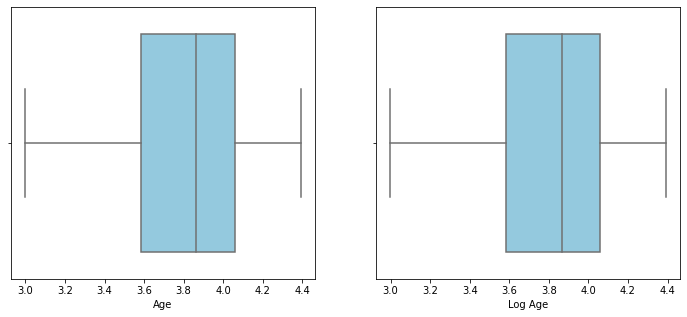

In [45]:
# 盒鬚圖(Box Plot)
fig, axs = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot( 1,2,1 )
sns.boxplot( train.Age, orient='h', color='skyblue' )
plt.xlabel( 'Age' ) 

plt.subplot( 1,2,2 )
sns.boxplot( train.Age, orient='h', color='skyblue' )
plt.xlabel( 'Log Age' ) 

plt.show()

In [46]:
# Age
# train['Age'] = train['Age'].fillna(train['Age'].mean())

In [47]:
# # Under 30
# filt = train['Age'] >= 30
# train.loc[filt, ["Under 30"]] = "No"
# filt = train['Age'] < 30
# train.loc[filt, ["Under 30"]] = "Yes"
# train['Under 30'] = train['Under 30'].map({'Yes':1, 'No':0})

In [48]:
# # Senior Citizen
# filt = train["Age"] >= 65
# train.loc[filt, ["Senior Citizen"]] = "Yes"
# train["Senior Citizen"] = train["Senior Citizen"].fillna("No")
# train["Senior Citizen"] = train["Senior Citizen"].map({"Yes":1, "No":0})

In [49]:
# Married
train["Married"] = train["Married"].fillna("No")
train["Married"] = train["Married"].map({"Yes":1, "No":0})

In [50]:
# Dependents, Number of Dependents
train["Number of Dependents"] = train["Number of Dependents"].fillna(0)
filt = train["Number of Dependents"] > 0
train.loc[filt, ["Dependents"]] = "Yes"
train["Dependents"] = train["Dependents"].fillna("No")
train["Dependents"] = train["Dependents"].map({"Yes":1, "No":0})

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

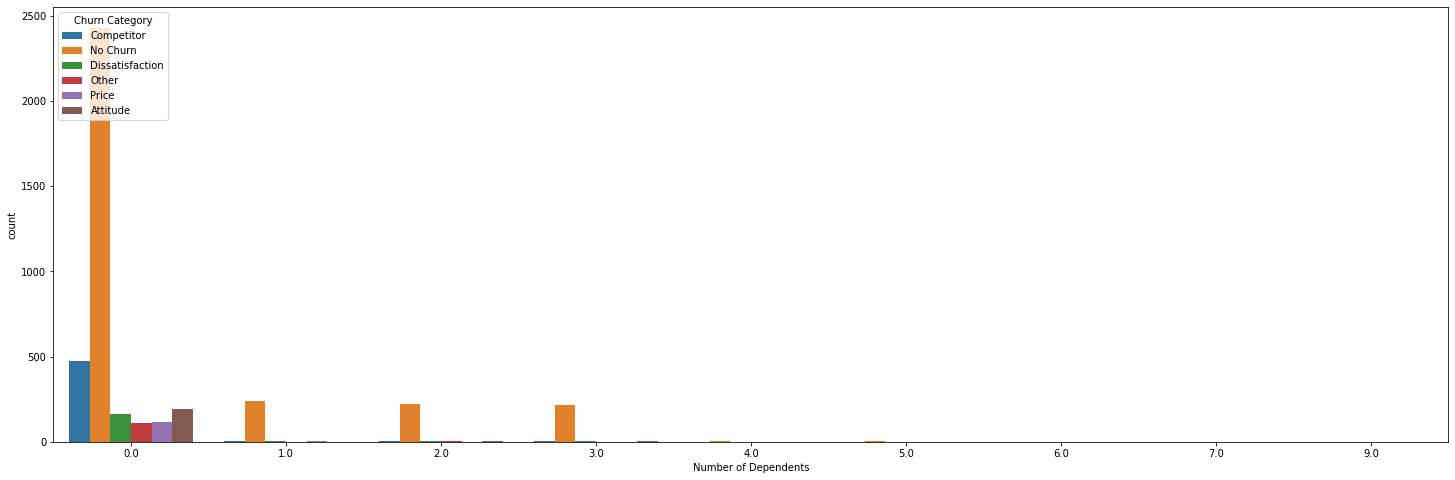

In [51]:
sns.countplot(train['Number of Dependents'], hue = train['Churn Category'])

In [52]:
# Satisfaction Score 暫時補平均
train['Satisfaction Score'] = train['Satisfaction Score'].fillna(train['Satisfaction Score'].mean())

In [53]:
train['Satisfaction Score'].mean()

3.2495827925088077

In [54]:
# 只有Q3、nan兩種值, Q3的改成1、nan的補0
train['Quarter'] = train['Quarter'].map({'Q3':1})
train['Quarter'] = train['Quarter'].fillna(0)

In [55]:
# Referred a Friend
filt = train['Number of Referrals'] > 0
train.loc[filt, ['Referred a Friend']] = 'Yes'
train['Referred a Friend'] = train['Referred a Friend'].fillna('No')
train['Referred a Friend'] = train['Referred a Friend'].map({'Yes':1, 'No':0})

In [56]:
# Number of Referrals 補零 (從Satisfation Scaore跟Number of Referrals的關係圖中, 沒有發現特別的相關性)
train['Number of Referrals'] = train['Number of Referrals'].fillna(0)

In [57]:
# Tenure in Months, 補平均數, note:發現使用月數與最後客戶有沒有流失有非常大的關係, 超過20個月以上的用戶幾乎沒有流失!! 目前感覺補得不太好
print(train['Tenure in Months'].mean())
train['Tenure in Months'] = train['Tenure in Months'].fillna(train['Tenure in Months'].mean())

32.53866122751715


In [58]:
# Offer, 暫時用Frequency endcoing, 空值補None
train['Offer'] = train['Offer'].fillna('None')
train['Offer'] = train['Offer'].map({'None':3718, 'Offer B':514, 'Offer E':475, 'Offer D':368, 'Offer A':305, 'Offer C':255})
train['Offer'].value_counts()

3718    4631
514      643
475      598
368      458
305      397
255      316
Name: Offer, dtype: int64

In [59]:
#Phone Service
train['Phone Service'] = train['Phone Service'].fillna('No')
train['Phone Service'] = train['Phone Service'].map({'Yes':1, 'No':0})

In [60]:
# Avg Monthly Long Distance Charges 補零
train['Avg Monthly Long Distance Charges'] = train['Avg Monthly Long Distance Charges'].fillna(0)

In [61]:
# Multiple Lines 補No, 
train['Multiple Lines'] = train['Multiple Lines'].fillna('No')
train['Multiple Lines'] = train['Multiple Lines'].map({'Yes':1, 'No':0})

In [62]:
# Internet Type 補None, frequency endcoding
train['Internet Type'] = train['Internet Type'].fillna('None')
train['Internet Type'] = train['Internet Type'].map({'None':2288, 'Fiber Optic':1852, 'DSL':978, 'Cable':518})
train['Internet Type'].value_counts()

2288    2837
1852    2299
978     1250
518      657
Name: Internet Type, dtype: int64

In [63]:
# Avg Monthly GB Download 看Internet Service補, 為Yes補平均 其餘補0
filt = train['Internet Service'] == 'Yes'
train.loc[filt, 'Avg Monthly GB Download'] = train.loc[filt, 'Avg Monthly GB Download'].fillna(train['Avg Monthly GB Download'].mean())
train['Avg Monthly GB Download'] = train['Avg Monthly GB Download'].fillna(0)

In [64]:
# Internet Service 看Avg Monthly GB Download為0補No, 不為0補Yes, one hot
filt = train['Avg Monthly GB Download'] != 0
train.loc[filt, ['Internet Service']] = train.loc[filt, ['Internet Service']].fillna('Yes')
train['Internet Service'] = train['Internet Service'].fillna('No')
train['Internet Service'] = train['Internet Service'].map({'Yes':1, 'No':0})

In [65]:
# Online Security 補No , one hot
# Online Backup 補No , one hot
# Device Protection Plan 補No , one hot
# Premium Tech Support 補No, one hot
# Streaming TV
# Streaming Movies
# Streaming Music
# Unlimited Data
train['Online Security'] = train['Online Security'].fillna('No')
train['Online Backup'] = train['Online Backup'].fillna('No')
train['Device Protection Plan'] = train['Device Protection Plan'].fillna('No')
train['Premium Tech Support'] = train['Premium Tech Support'].fillna('No')
train['Streaming TV'] = train['Streaming TV'].fillna('No')
train['Streaming Movies'] = train['Streaming Movies'].fillna('No')
train['Streaming Music'] = train['Streaming Music'].fillna('No')
train['Unlimited Data'] = train['Unlimited Data'].fillna('No')

train['Online Backup'] = train['Online Backup'].map({'Yes':1, 'No':0})
train['Online Security'] = train['Online Security'].map({'Yes':1, 'No':0})
train['Device Protection Plan'] = train['Device Protection Plan'].map({'Yes':1, 'No':0})
train['Premium Tech Support'] = train['Premium Tech Support'].map({'Yes':1, 'No':0})
train['Streaming TV'] = train['Streaming TV'].map({'Yes':1, 'No':0})
train['Streaming Movies'] = train['Streaming Movies'].map({'Yes':1, 'No':0})
train['Streaming Music'] = train['Streaming Music'].map({'Yes':1, 'No':0})
train['Unlimited Data'] = train['Unlimited Data'].map({'Yes':1, 'No':0})

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    2725
1.0    1650
3.0    1467
2.0    1201
Name: Contract, dtype: int64

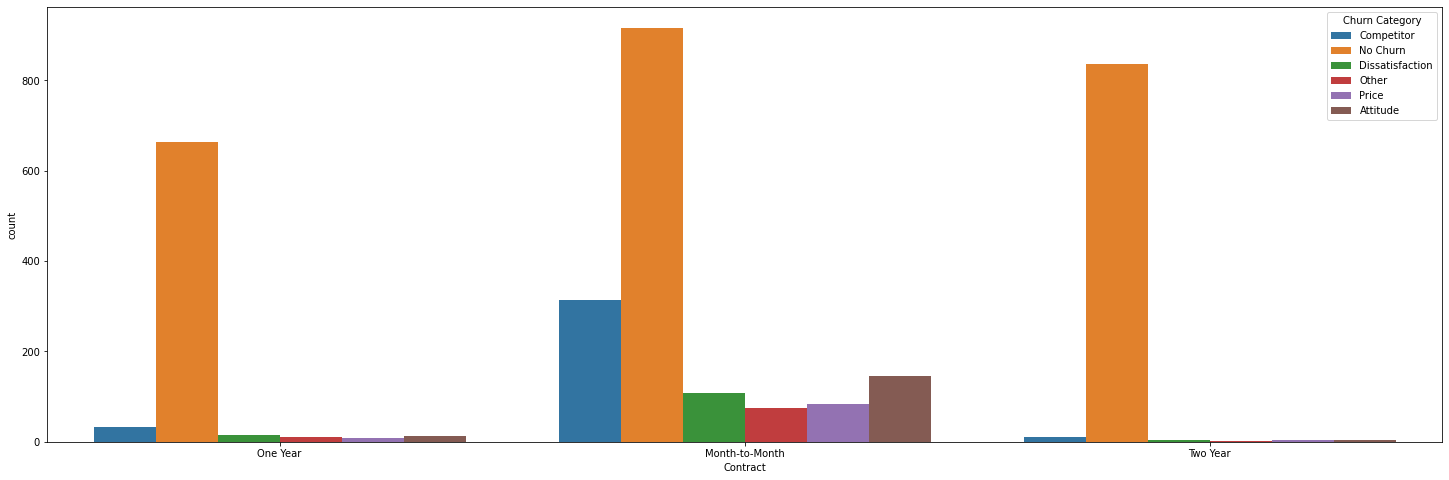

In [66]:
# Contract 空值補1, 代表未知, 月為單位補0, 未知補1, 1年為單位補2, 2年為單位補3
sns.countplot(train['Contract'], hue = train['Churn Category'])
train['Contract'] = train['Contract'].map({'Month-to-Month':0, 'One Year':2, 'Two Year':3})
train['Contract'] = train['Contract'].fillna(1)
train['Contract'].value_counts()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Yes       3183
No        2210
unknow    1650
Name: Paperless Billing, dtype: int64


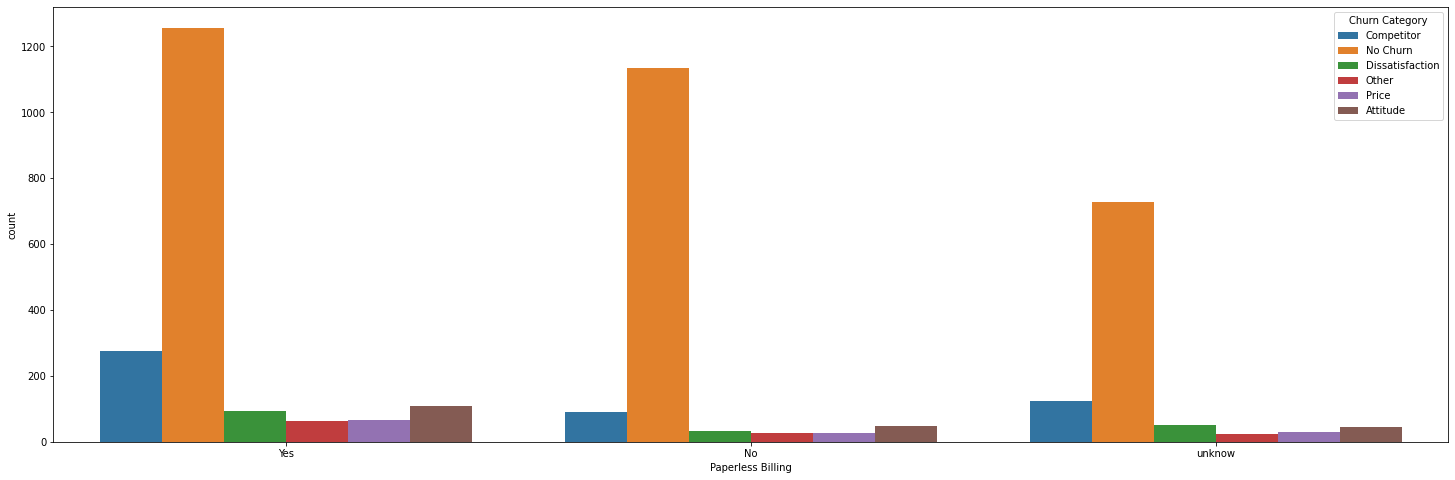

In [67]:
# Paperless Billing,缺值補未知, frequence endcoding
train['Paperless Billing'] = train['Paperless Billing'].fillna('unknow')
sns.countplot(train['Paperless Billing'], hue = train['Churn Category'])
print(train['Paperless Billing'].value_counts())
train['Paperless Billing'] = train['Paperless Billing'].map({'Yes':2540, 'No':1763, 'unknow': 1332})

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Bank Withdrawal    3004
Credit Card        2099
unknow             1650
Mailed Check        290
Name: Payment Method, dtype: int64


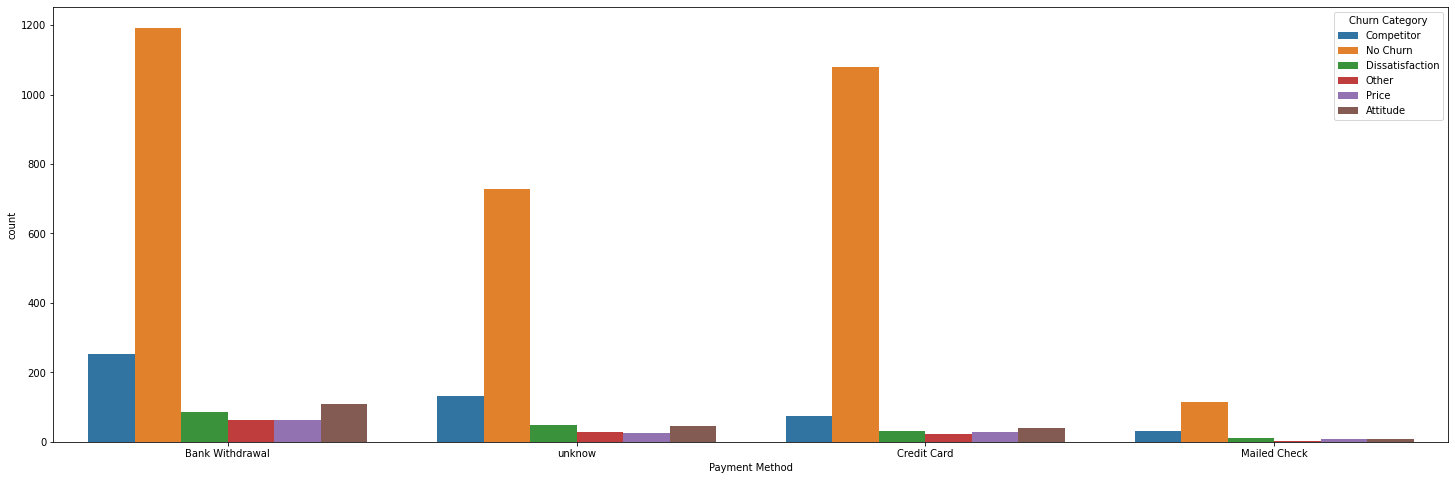

In [68]:
# Payment Method,缺值補未知, frequence endcoding
train['Payment Method'] = train['Payment Method'].fillna('unknow')
sns.countplot(train['Payment Method'], hue = train['Churn Category'])
print(train['Payment Method'].value_counts())
train['Payment Method'] = train['Payment Method'].map({'Bank Withdrawal':2399, 'Credit Card':1681, 'unknow': 1327, 'Mailed Check':228})

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


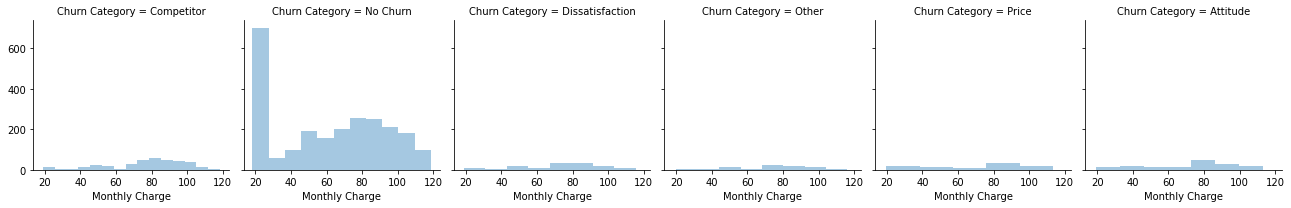

In [69]:
# Monthly Charge 補平均
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Monthly Charge', kde=False)
train['Monthly Charge'] = train['Monthly Charge'].fillna(train['Monthly Charge'].mean())

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


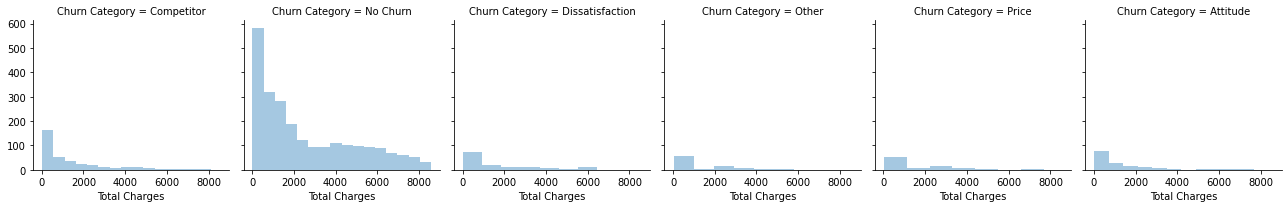

In [70]:
# Total Charges ,暫時補均值, Note:未來可以跟付費月數 生成平均每月付費
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Total Charges', kde=False)
train['Total Charges'] = train['Total Charges'].fillna(train['Total Charges'].mean())

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    7043.000000
mean        1.447581
std         6.828076
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.790000
Name: Total Refunds, dtype: float64

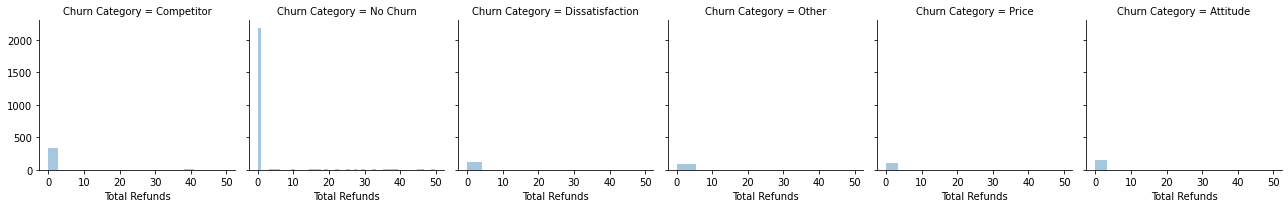

In [71]:
# Total Refunds 補零
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Total Refunds', kde=False)
train['Total Refunds'] = train['Total Refunds'].fillna(0)
train['Total Refunds'].describe()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    7043.000000
mean        5.205168
std        21.990479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       150.000000
Name: Total Extra Data Charges, dtype: float64

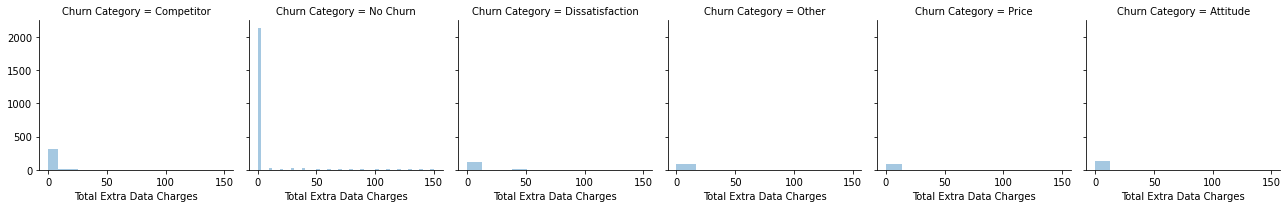

In [72]:
# Total Extra Data Charges, 補零
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Total Extra Data Charges', kde=False)
train['Total Extra Data Charges'] = train['Total Extra Data Charges'].fillna(0)
train['Total Extra Data Charges'].describe()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    7043.000000
mean      574.585270
std       804.056095
min         0.000000
25%         0.000000
50%       166.800000
75%       882.360000
max      3564.000000
Name: Total Long Distance Charges, dtype: float64

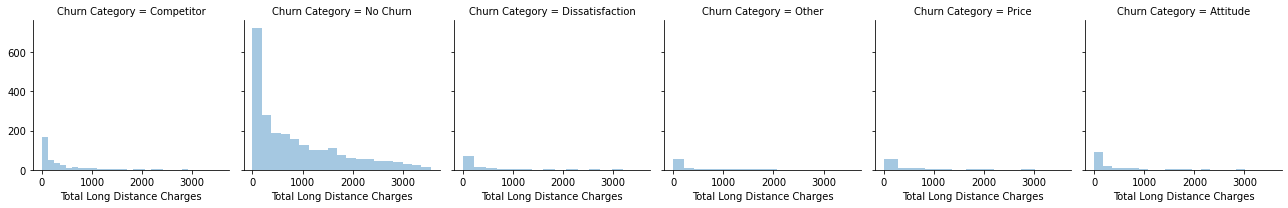

In [73]:
# Total Long Distance Charges, 補零
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Total Long Distance Charges', kde=False)
train['Total Long Distance Charges'] = train['Total Long Distance Charges'].fillna(0)
train['Total Long Distance Charges'].describe()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     7043.000000
mean      3044.441077
std       2503.209367
min         21.360000
25%        980.375000
50%       3044.441077
75%       3784.100000
max      11979.340000
Name: Total Revenue, dtype: float64

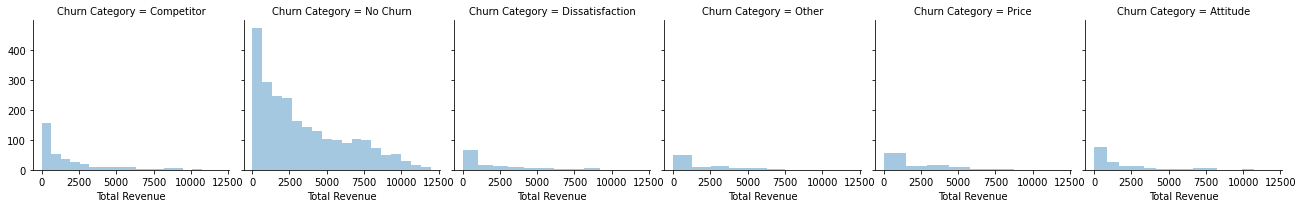

In [74]:
# Total Revenue, 補平均
g = sns.FacetGrid(train, col='Churn Category')
g.map(sns.distplot, 'Total Revenue', kde=False)
train['Total Revenue'] = train['Total Revenue'].fillna(train['Total Revenue'].mean())
train['Total Revenue'].describe()

In [75]:
#train['Payment Method'].value_counts()
#train['Total Revenue'].sample(50)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 1408
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             0 non-null      float64
 2   Age                                7043 non-null   float64
 3   Under 30                           7043 non-null   int64  
 4   Senior Citizen                     7043 non-null   int64  
 5   Married                            7043 non-null   int64  
 6   Dependents                         7043 non-null   int64  
 7   Number of Dependents               7043 non-null   float64
 8   Country                            5393 non-null   object 
 9   State                              5393 non-null   object 
 10  City                               5393 non-null   object 
 11  Zip Code                           5393 non-null   float

In [77]:
# step 0 經度 緯度 補 經緯度
filt1 = train['Lat Long'].isnull()
filt2 = train['Latitude'].notnull()
filt3 = train['Longitude'].notnull()
train.loc[(filt1&filt2&filt3), ['Lat Long']] = train.loc[(filt1&filt2&filt3), ['Lat Long','Latitude','Longitude']].apply(lambda x:str(x['Latitude']) + ', ' + str(x['Longitude']),axis=1)

# step 1 經緯度 補zip code
from geopy.geocoders import Nominatim
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
filt1 = train['Zip Code'].isnull()
filt2 = train['Lat Long'].notnull()

from geopy.geocoders import Nominatim
# 37.305622, -122.000887
def get_Zipcode(lat_long):
    latitude, longitude = lat_long.split(', ')
    location = geolocator.reverse(latitude+","+longitude)
    address = location.raw['address']
    return address.get('postcode')

#get_Zipcode("37.305622, -122.000887")

train.loc[(filt1&filt2),['Zip Code']] = train.loc[(filt1&filt2),['Lat Long']].apply(lambda x:get_Zipcode(x['Lat Long']), axis=1)
train['Zip Code'] = pd.to_numeric(train['Zip Code'], errors='coerce').fillna('0').astype('int32')

In [78]:
from uszipcode import SearchEngine
def get_city(zip_code):
    sr = SearchEngine()
    try:
        z = sr.by_zipcode(zip_code)
        return z.major_city
    except:
        return ""
    #print(z.major_city)
    

#print(get_city(94591))
filt = train['City'].isnull()
filt1 = train['Zip Code'].notnull()

#train.loc[(filt1&filt2),['Zip Code']] = train.loc[(filt1&filt2),['Lat Long']].apply(lambda x:get_Zipcode(x['Lat Long']), axis=1)
train.loc[(filt&filt1), ['City']] = train.loc[(filt&filt1), ['Zip Code']].apply(lambda x:get_city(x['Zip Code']) ,axis=1)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [79]:
train = train.drop(['Population'], axis=1)
population_data = pd.read_csv("./data/population.csv")
train = pd.merge(train, population_data, how="left", on="Zip Code")

In [80]:
def get_state(zip_code):
    sr = SearchEngine()
    try:
        z = sr.by_zipcode(zip_code)
        return z.state
    except:
        return ""
    #print(z.major_city)
    

#print(get_city(94591))
filt = train['State'].isnull()
filt1 = train['Zip Code'].notnull()

#train.loc[(filt1&filt2),['Zip Code']] = train.loc[(filt1&filt2),['Lat Long']].apply(lambda x:get_Zipcode(x['Lat Long']), axis=1)
train.loc[(filt&filt1), ['State']] = train.loc[(filt&filt1), ['Zip Code']].apply(lambda x:get_state(x['Zip Code']) ,axis=1)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             0 non-null      float64
 2   Age                                7043 non-null   float64
 3   Under 30                           7043 non-null   int64  
 4   Senior Citizen                     7043 non-null   int64  
 5   Married                            7043 non-null   int64  
 6   Dependents                         7043 non-null   int64  
 7   Number of Dependents               7043 non-null   float64
 8   Country                            5393 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int32

In [82]:
filt1 = train['Country'].isnull()
filt2 = train['Lat Long'].notnull()

def get_Country(lat_long):
    latitude, longitude = lat_long.split(', ')
    location = geolocator.reverse(latitude+","+longitude)
    address = location.raw['address']
    return address.getaddress.get('country', '')

#get_Zipcode("37.305622, -122.000887")

train.loc[(filt1&filt2),['Country']] = train.loc[(filt1&filt2),['Lat Long']].apply(lambda x:get_Zipcode(x['Lat Long']), axis=1)

In [83]:
# population 來自 Zipcode, 沒有Zipcode暫時補均值
train['Population'] = train['Population'].fillna(train['Population'].mean())

In [84]:
# Country
train['Country'] = train['Country'].fillna('unknow')
country_freq = train['Country'].value_counts().to_dict()
train.Country = train.Country.map(country_freq)

In [85]:
# State
train['State'] = train['State'].fillna('unknow')
state_freq = train['State'].value_counts().to_dict()
train.State = train.State.map(state_freq)

In [86]:
#City
train['City'].value_counts()
flit = train['City'].isnull()
flit

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: City, Length: 7043, dtype: bool

In [87]:
# City
city_freq = train['City'].value_counts().to_dict()
train['City'] = train['City'].fillna('unknow')
train.City = train.City.map(city_freq)

In [88]:
# Zip Code
train['Zip Code'].value_counts()

0        1078
92028      39
92027      34
92122      30
92126      28
         ... 
94531       1
95101       1
90214       1
93202       1
94585       1
Name: Zip Code, Length: 1651, dtype: int64

In [89]:
# drop feature
train = train.drop(['Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis=1)
train = train.drop(['ID'], axis=1)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             0 non-null      float64
 2   Age                                7043 non-null   float64
 3   Under 30                           7043 non-null   int64  
 4   Senior Citizen                     7043 non-null   int64  
 5   Married                            7043 non-null   int64  
 6   Dependents                         7043 non-null   int64  
 7   Number of Dependents               7043 non-null   float64
 8   Country                            7043 non-null   int64  
 9   State                              7043 non-null   int64  
 10  City                               7043 non-null   int64  
 11  Satisfaction Score                 7043 non-null   float

# 分割資料

In [92]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tqdm import trange
# train, test 分離 並刪除標記行
filt_test = train['is_train'] == 0
filt_train = train['is_train'] == 1
test = train.loc[filt_test]
train = train.loc[filt_train]
# train中, 沒有Churn Category的丟掉
filt = train['Churn Category'].notnull()
train = train.loc[filt]
#print(test)
test = test.drop(columns=['Customer ID' ,'is_train', 'Churn Category'])
train_y = train['Churn Category']
train_y = train_y.map({'Attitude':3, 'Competitor':1, 'Dissatisfaction':2, 'Other':5, 'Price':4, 'No Churn':0})
train_x = train.drop(columns=['Customer ID' ,'is_train', 'Churn Category'])
print(test.shape)

(1409, 40)


In [93]:
# from sklearn.model_selection import train_test_split
# train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.25, random_state=1)

# Model
XGboost:https://ithelp.ithome.com.tw/articles/10273094

In [94]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3, use_label_encoder=False)
# 使用訓練資料訓練模型
xgboostModel.fit(train_x, train_y)
# 使用訓練資料預測分類
# predicted = xgboostModel.predict(train_x)

# 預測成功的比例
# print('驗證集: ', xgboostModel.score(val_x,val_y))

# 使用訓練資料預測分類
predicted = xgboostModel.predict(test)

[18:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


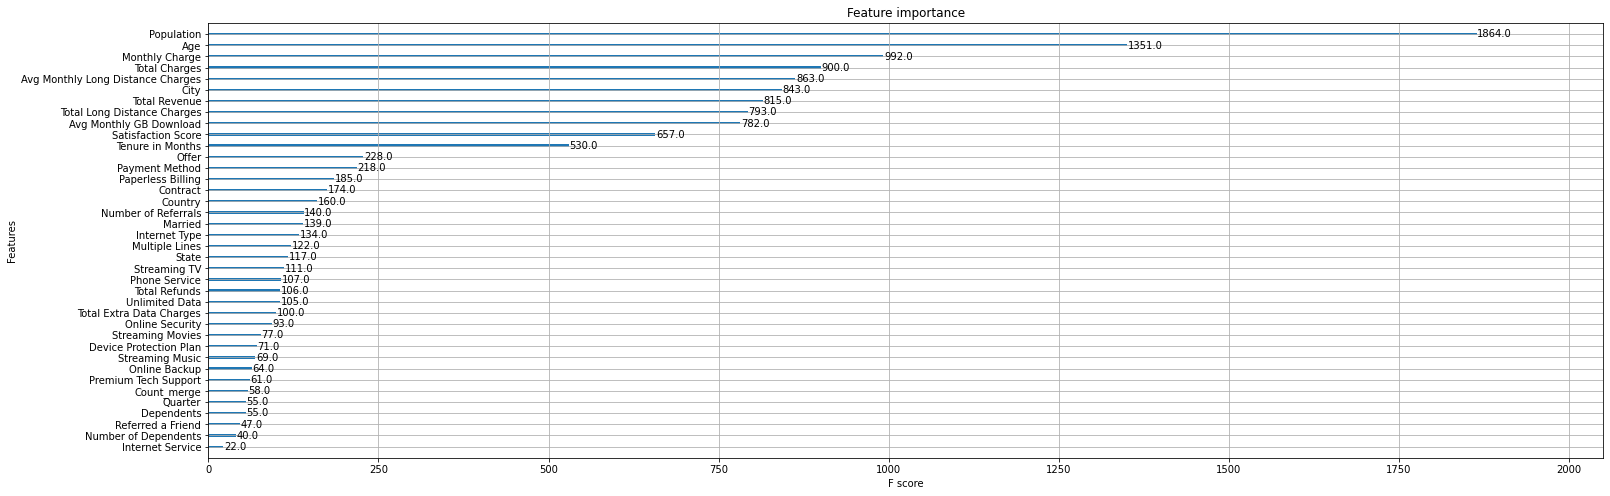

In [95]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgboostModel)
pyplot.show()

In [96]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import accuracy_score

# #fit model using each importance as a threshold
# thresholds = np.sort(xgboostModel.feature_importances_)
# accuracy_list = []
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(xgboostModel,threshold=thresh,prefit=True)
#     select_X_train = selection.transform(train_x)
#     # train model
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, train_y)
#     # eval model
#     select_X_val = selection.transform(val_x)
#     y_pred = selection_model.predict(select_X_val)
#     #predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(val_y,y_pred)
#     accuracy_list.append(accuracy)
#     #print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

# for i in range(len(thresholds)):
#     selection = SelectFromModel(xgboostModel,threshold=thresholds[i],prefit=True )
#     select_X_train = selection.transform(train_x)
#     print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[i], select_X_train.shape[1], accuracy_list[i] * 100.0))

In [97]:
# thresholds = np.sort(xgboostModel.feature_importances_)
# thresholds
# # selection = SelectFromModel(xgboostModel,threshold=thresh,prefit=True)
# # select_X_train = selection.transform(train_x)

In [98]:
# selection = SelectFromModel(xgboostModel,threshold=0.019,prefit=True)
# select_X_train = selection.transform(train_x)

# # train model
# selection_model = XGBClassifier()
# selection_model.fit(select_X_train, train_y)

# # eval model
# select_X_val = selection.transform(val_x)
# predicted = selection_model.predict(select_X_val)
# #predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(val_y,predicted)
# print("驗證集：", accuracy)

In [99]:
# selection = SelectFromModel(xgboostModel,threshold=0.019,prefit=True)
# select_X_test = selection.transform(test)
# predicted = selection_model.predict(select_X_test)

In [100]:
# from sklearn import svm
# clf=svm.SVC(kernel='rbf',C=1,gamma='auto')
# clf.fit(train_x, train_y)

# print('驗證集: ', clf.score(val_x, val_y))

# predicted = clf.predict(test)

In [101]:
# #https://ithelp.ithome.com.tw/articles/10187569
# from sklearn import ensemble, preprocessing, metrics
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

# max_accur = 0
# for i in range(10):
#     train_x1, val_x, train_y1, val_y = train_test_split(train_x, train_y, test_size=0.1)
#     forest = ensemble.RandomForestClassifier(n_estimators = 100)
#     forest_fit = forest.fit(train_x1, train_y1)
#     # 預測
#     val_y_predicted = forest.predict(val_x)
#     accuracy = metrics.accuracy_score(val_y, val_y_predicted)
#     print('第{}次驗證: '.format(i+1), accuracy)
#     if accuracy > max_accur:
#         max_accur = accuracy
#         max_forest_model = forest

# train_y_predicted = max_forest_model.predict(train_x)
# accuracy = metrics.accuracy_score(train_y, train_y_predicted)
# print('最終驗證: ', accuracy)
# #scores = cross_val_score(forest, train_x, train_y, cv = 10)

# # 預測
# predicted = max_forest_model.predict(test)
# # 績效
# #print('cross_驗證集: ', scores)

In [102]:
# cross validation on XGboost
from xgboost import XGBClassifier
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

max_accur = 0
for i in range(20):
    train_x1, val_x, train_y1, val_y = train_test_split(train_x, train_y, test_size=0.1)
    xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3, use_label_encoder=False)
    
    # 使用訓練資料訓練模型
    xgboostModel.fit(train_x1, train_y1)
    
    # 預測
    #val_y_predicted = xgboostModel.predict(val_x)
    accuracy = xgboostModel.score(val_x,val_y)
    print('第{}次驗證: '.format(i+1), accuracy)
    if accuracy > max_accur:
        max_accur = accuracy
        max_model = xgboostModel

print('最好分數: ', max_accur)
#scores = cross_val_score(forest, train_x, train_y, cv = 10)

# 預測
predicted = max_model.predict(test)

[18:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
第1次驗證:  0.7706855791962175
[18:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
第2次驗證:  0.8108747044917257
[18:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
第3次驗證:  0.822

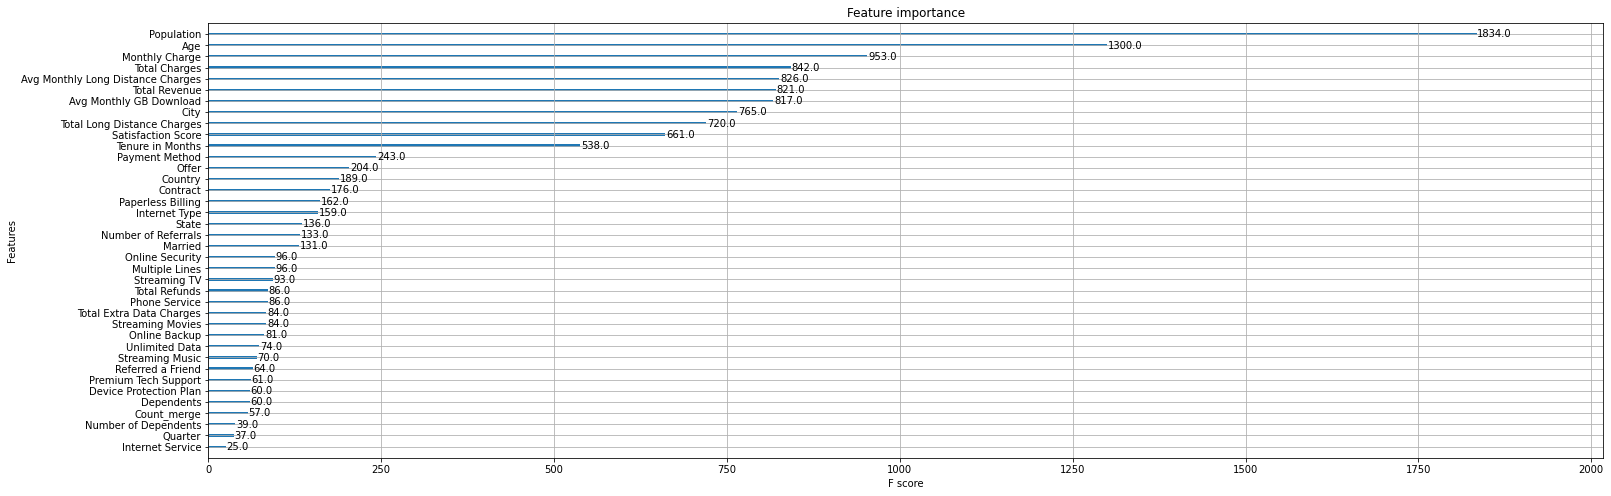

In [103]:
from xgboost import plot_importance
# plot feature importance
plot_importance(max_model)
pyplot.show()

In [104]:
# from xgboost import plot_importance
# # plot feature importance
# plot_importance(max_model)
# pyplot.show()

In [105]:
# 最好分數:  0.8416075650118203

# 最好分數:  0.8486997635933806

In [106]:
# from sklearn import ensemble, preprocessing, metrics
# from sklearn.model_selection import cross_val_score

# forest = ensemble.RandomForestClassifier(n_estimators = 100)
# forest_fit = forest.fit(train_x, train_y)

# # 預測
# val_y_predicted = forest.predict(val_x)

# #scores = cross_val_score(forest, train_x, train_y, cv = 10)

# # 績效
# accuracy = metrics.accuracy_score(val_y, val_y_predicted)
# print('驗證集: ', accuracy)
# #print('cross_驗證集: ', scores)

In [107]:
# #調參後的random forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# clf = RandomForestClassifier(random_state = 27,oob_score=True, max_depth = 9, min_samples_leaf = 1,max_features=20,n_estimators=173)
# clf.fit(train_x, train_y)

# print('訓練集: ',clf.score(train_x,train_y))

# print('驗證集: ',clf.oob_score_)
# predicted = clf.predict(test)

In [108]:
# #原始random forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# # X, y = make_classification(n_samples=1000, n_features=4,
# #                            n_informative=2, n_redundant=0,
# #                            random_state=0, shuffle=False)
# clf = RandomForestClassifier(random_state = 2,oob_score=True,max_depth = 9)
# clf.fit(train_x, train_y)

# print('訓練集: ',clf.score(train_x,train_y))

# print('驗證集: ',clf.oob_score_)

In [109]:
#預測
# predicted = forest.predict(test)

In [110]:
predicted

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
submission = pd.read_csv('./data/sample_submission.csv')

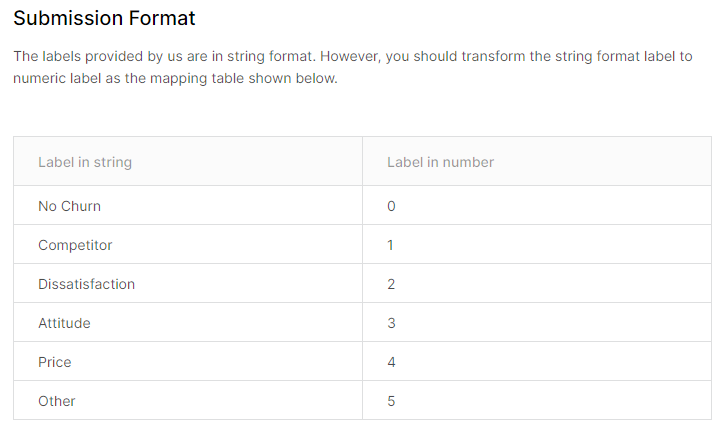

In [112]:
submission['Churn Category'] = predicted
submission

,Customer ID,Churn Category
0,9938-EKRGF,1
1,7379-POKDZ,0
2,0654-HMSHN,0
3,2045-BMBTJ,0
4,0701-TJSEF,1
...,...,...
1404,4587-VVTOX,0
1405,7716-YTYHG,0
1406,7649-PHJVR,1
1407,7855-DIWPO,0


In [113]:
submission['Churn Category'] = predicted
#submission['Churn Category'] = submission['Churn Category'].map({'Attitude':3, 'Competitor':1, 'Dissatisfaction':2, 'Other':5, 'Price':4, 'No Churn':0})
submission['Churn Category'].value_counts()

0    1107
1     204
3      43
2      27
4      16
5      12
Name: Churn Category, dtype: int64

In [114]:
submission

,Customer ID,Churn Category
0,9938-EKRGF,1
1,7379-POKDZ,0
2,0654-HMSHN,0
3,2045-BMBTJ,0
4,0701-TJSEF,1
...,...,...
1404,4587-VVTOX,0
1405,7716-YTYHG,0
1406,7649-PHJVR,1
1407,7855-DIWPO,0


In [115]:
import time
local_time = time.localtime() # 取得時間元組
timeString = time.strftime("%m-%d_%H%M", local_time) # 轉成想要的字串形式
print(timeString)

01-19_1807


In [116]:
submission.to_csv('./submit/sub_{}.csv'.format(timeString), index=False, header=True)